<a href="https://colab.research.google.com/github/John-Akech/Height-Weight_Linear_Regression/blob/master/Height_Weight_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Load the dataset and show the first five rows
df=pd.read_csv('/content/weight-height 2.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0.5, 1.0, 'Height vs Weight')

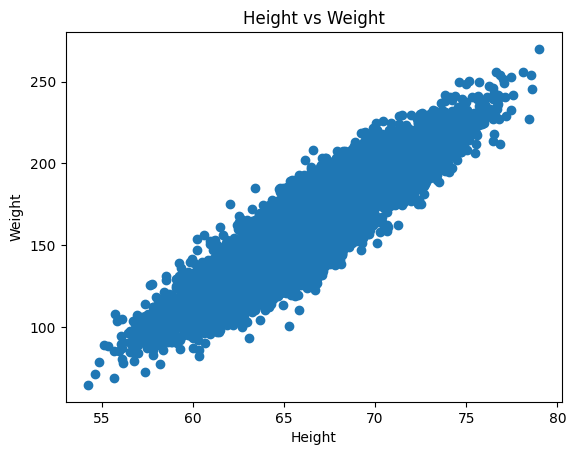

In [86]:
# Visualize the data using scatter
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [87]:
# Drop the non numerical data
df.drop('Gender',axis=1,inplace=True)

In [88]:
# DIsplay the data
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [89]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


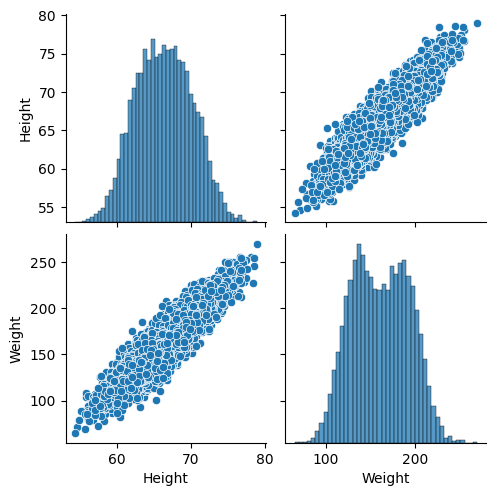

In [90]:
sns.pairplot(df)

In [91]:
# Define independent (x) and dependent (y) variables
x = df[['Height']]  # Extract 'Height' as a 2D DataFrame
y = df['Weight']    # Extract 'Weight' as a 1D Series

In [92]:
print("x:\n", x)
print("y:\n", y)
print("x shape:", x.shape)  # Should show (number of rows, 1)
print("y shape:", y.shape)  # Should show (number of rows,)

x:
          Height
0     73.847017
1     68.781904
2     74.110105
3     71.730978
4     69.881796
...         ...
9995  66.172652
9996  67.067155
9997  63.867992
9998  69.034243
9999  61.944246

[10000 rows x 1 columns]
y:
 0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64
x shape: (10000, 1)
y shape: (10000,)


In [93]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [94]:
# Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [95]:
x_test

array([[ 0.60863475],
       [ 0.64561305],
       [ 0.01295416],
       ...,
       [-1.48363282],
       [ 0.20143303],
       [ 0.32447927]])

In [96]:
# Apply the ML Algorithm (linear regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [97]:
print(f"Coefficient or slope {model.coef_}")
print(f"Intercept {model.intercept_}")

Coefficient or slope [29.59862269]
Intercept 161.23075926318265


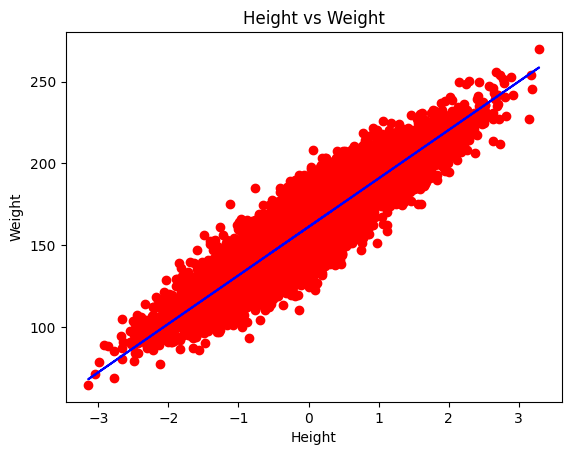

In [98]:
# plot the best fit line train data
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [99]:
# Prediction for the test data
y_pred = model.predict(x_test)
y_pred

array([179.24550972, 180.3400163 , 161.61418442, ..., 117.31727114,
       167.19289954, 170.83489876])

In [100]:
# Performance metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score #(Ajusted r2)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))

In [101]:
print(f"Mean Absolute Error:, {mae}")
print(f"Mean Squared Error:, {mse}")
print(f"R-squared:, {r2}")
print(f"Adjusted R-squared:, {adj_r2}")

Mean Absolute Error:, 9.720990891992406
Mean Squared Error:, 149.31479307438
R-squared:, 0.8573532043041168
Adjusted R-squared:, 0.8572960999023169


In [102]:
# OLS
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 4.400e+04
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        07:40:28   Log-Likelihood:                -29414.
No. Observations:                7500   AIC:                         5.883e+04
Df Residuals:                    7498   BIC:                         5.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.2308      0.141   1142.607      0.000     160.954     161.507
x1            29.5986      0.141    209.759      0.000      29.322      29.875
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.239
Skew:                           0.028   Prob(JB):                        0.538
Kurtosis:                       2.973   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# How to do prediction for the new data
model.predict(scalar.transform([[69]]))

array([181.65453588])